<a href="https://colab.research.google.com/github/itimes-digital/Bootcamp-Analista-de-Machine-Learning-IGTI/blob/master/redes_neurais_numeros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [4]:
base = datasets.load_digits()
entradas = base.data
saidas = base.target

In [9]:
np.size(entradas)

115008

In [10]:
np.size(saidas)

1797

In [11]:
np.shape(entradas)

(1797, 64)

In [12]:
np.shape(saidas)

(1797,)

In [13]:
print(base.data[0])

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


In [14]:
print(base.images[0])

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


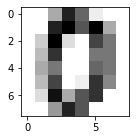

In [26]:
plt.figure(figsize=(2,2))
plt.imshow(base.images[0],
           cmap = plt.cm.gray_r)

In [27]:
from sklearn.model_selection import train_test_split

etreino, eteste, streino, steste = train_test_split(entradas, 
                                                    saidas, 
                                                    test_size = 0.1, 
                                                    random_state = 2)

In [28]:
from sklearn import svm
classificador = svm.SVC()
classificador.fit(etreino, streino)
previsor = classificador.predict(eteste)


In [30]:
from sklearn import metrics
margem_acerto = metrics.accuracy_score(steste, previsor)

In [31]:
margem_acerto

0.9611111111111111

In [44]:
import matplotlib.image as mimg

In [69]:
imagem = mimg.imread('/content/sample_data/2_v2.png')
print(imagem)

[[[1. 1. 1.]
  [1. 1. 1.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [0. 0. 0.]
  [0. 0. 0.]
  [1. 1. 1.]
  [1. 1. 1.]
  [0. 0. 0.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [0. 0. 0.]
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  [0. 0. 0.]
  [0. 0. 0.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  [0. 0. 0.]
  [1. 1. 1.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  [0. 0. 0.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[0. 0. 0.]
  [1. 1. 1.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]]


In [61]:
def rgb2gray(rgb):
  img_array = np.dot(rgb[...,:3], [0.299,0.587,0.114])
  img_array = (16 - (img_array * 16)).astype(int)
  img_array = img_array.flatten()
  return img_array

In [62]:
rgb2gray(imagem)

array([ 0,  0, 16, 16, 16, 16,  0,  0,  0, 16, 16,  0,  0, 16,  0,  0,  0,
       16,  0,  0,  0, 16, 16,  0,  0,  0,  0,  0,  0,  0, 16,  0, 16, 16,
        0,  0,  0, 16,  0,  0, 16,  0, 16, 16, 16, 16,  0,  0, 16, 16, 16,
       16, 16, 16,  0,  0,  0,  0,  0,  0,  0, 16, 16, 16])

In [63]:
identificador = svm.SVC()
identificador.fit(entradas, saidas)
previsor_id = identificador.predict([rgb2gray(imagem)])
print(previsor_id)

[2]


In [64]:
from sklearn.linear_model import LogisticRegression

logr = LogisticRegression()
logr.fit(etreino, streino)
previsor_logr = logr.predict(eteste)
acerto_logr = metrics.accuracy_score(steste, previsor_logr)
print(acerto_logr)

0.9333333333333333


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [70]:
regressor = LogisticRegression()
regressor.fit(entradas, saidas)
previsor_regl = regressor.predict([rgb2gray(imagem)])
print(previsor_regl)

[2]


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
